In [21]:
import cv2
import numpy as np
import pytesseract
from PIL import Image

frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/haarcascade_russian_plate_number.xml")
minArea = 500

def listToString(s): 
    str1 = " "    
    return (str1.join(s))  
# D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/q2.mp4

cap =cv2.VideoCapture("C:/Users/subha/MY_PROJECTS/Car-License-Plate-Recognition/test.MOV")
cap.set(3,frameWidth)
cap.set(4,franeHeight)
cap.set(10,150)

count = 0
recognized_list=[]
line_conf = []
while (cap.isOpened()):
    success , img  = cap.read()
    if success == True:
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        numberPlates = plateCascade .detectMultiScale(imgGray, 1.1, 4)

        for (x, y, w, h) in numberPlates:
            area = w*h
            if area > minArea:
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
                #cv2.putText(img,"NumberPlate",(x,y-5),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
                imgRoi = img[y:y+h,x:x+w]
                custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890-." '
                recognized_plate = pytesseract.image_to_string(imgRoi, config=custom_config)
                #print("PlateNo "+recognized_plate)
                #print(len(recognized_plate))
                if recognized_plate is not None :                    
                    if (len(recognized_plate)==11) and (recognized_plate[0] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[1] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[2] not in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[3] in ("-",".")) and (recognized_plate[4] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[5] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[6] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[7] not in ("1","2","3","4","5","6","7","8","9","0")):
                    #if (len(recognized_plate)>=7) and (recognized_plate[2] in ("1","2","3","4","5","6","7","8","9","0"))  :
#                         test=pytesseract.image_to_data(Image.open("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/cascade/IMAGES"+str(count)+".jpg"),config=custom_config,output_type='data.frame')
#                         test = test[test.conf != -1]
                        
#                         lines = test.groupby(['page_num', 'block_num', 'par_num', 'line_num'])['text'] \
#                                      .apply(lambda x: ' '.join(list(x))).tolist()
                        
#                         confs = test.groupby(['page_num', 'block_num', 'par_num', 'line_num'])['conf'].min().tolist()

                        

#                         for i in range(len(lines)):
#                             if lines[i].strip():
#                                 line_conf.append((lines[i], round(confs[i],3)))
#                         print(line_conf)
                        cv2.putText(img,recognized_plate,(x,y-50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
                        cv2.imshow("ROI",imgRoi)
                        recognized_list.append(recognized_plate)
                        recognized_list=list(set(recognized_list))
                        print(recognized_list)
                        cv2.imwrite("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/cascade/IMAGES"+str(count)+".jpg",imgRoi)
                        
                        
        cv2.imshow("Result",img)
        if cv2.waitKey(1) & 0xFF ==ord('s'):
            
            cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
            cv2.putText(img,"Scan Saved",(15,265),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
            cv2.imshow("Result",img)
            cv2.waitKey(500)
            count+=1
    else:
        break
        
print("The list of CAR license plates read by ENGINE :"+ listToString(recognized_list))
cap.release()
cv2.destroyAllWindows()

['29A-331.85\n']
['29A-331.85\n']
['29A-331.85\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-331.85\n', '30A-612.35\n']
['29A-901.01\n', '29A-331.85\n', '30A-612.35\n']
['30A-612.35\n', '29A-331.85\n', '29A-901.01\n']
['29A-901.01\n', '29A-331.85\n', '30A-612.35\n']
['30A-612.35\n', '29A-331.85\n', '29A-901.01\n']
['29A-901.01\n', '29A-331.85\n', '30A-612.35\n']
['30A-612.35\n', '29A-331.85\n', '29A-901.01\n']
['29A-901.01\n', '29A-331.85\n', '30A-612.35\n']
['30A-612.35\n', '29A-331.85\n', '29A-901.01\n']
['29A-901.01\n', '29A-331.85\n', '30A-612.35\n']
['30A-612.35\n', '29A-331.85\n', '29A-901.01\n']
['29A-901.01\n', '29A-331.85\n', '30A-612.35\n']
['30A-612.35\n', '29A-331.85\n', '29A-901.01\n']
['29A-901.01\n', '29A-331.85\n'

KeyboardInterrupt: 

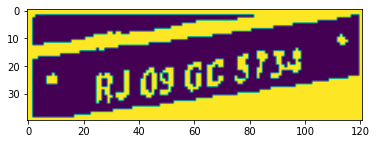

In [20]:
im=cv2.imread("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/cascade/IMAGES0.jpg")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
print(pytesseract.image_to_string("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/cascade/IMAGES0.jpg",config=custom_config))
plt.imshow(thresh)
plt.show()

In [18]:
import cv2
import numpy as np
import easyocr



frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/haarcascade_russian_plate_number.xml")
minArea = 500
#D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/q2.mp4
#     C:/Users/subha/MY_PROJECTS/Car-License-Plate-Recognition/test.MOV
cap =cv2.VideoCapture("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/q2.mp4")
cap.set(3,frameWidth)
cap.set(4,franeHeight)
cap.set(10,150)

count = 0
recognized_list=[]
while True:
    success , img  = cap.read()

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    numberPlates = plateCascade .detectMultiScale(imgGray, 1.1, 4)

    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img,"NumberPlate",(x,y-5),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            imgRoi = img[y:y+h,x:x+w]
            cv2.imwrite('D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/cascade/frame%d.jpg'%count,imgRoi)
            custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890-." '
            test=pytesseract.image_to_data(Image.open("D:/SUBHAJIT/LEXMARK/Number_Plate_Detection-master/cascade/frame%d.jpg"%count),config=custom_config,output_type='data.frame')
            test = test[test.conf != -1]

            lines = test.groupby(['page_num', 'block_num', 'par_num', 'line_num'])['text'] \
                         .apply(lambda x: ' '.join(list(x))).tolist()

            confs = test.groupby(['page_num', 'block_num', 'par_num', 'line_num'])['conf'].mean().tolist()



            for i in range(len(lines)):
                if lines[i].strip():
                    line_conf.append((lines[i], round(confs[i],3)))
            print(line_conf)
#             if recognized_plate is not None :                    
#                 if (len(recognized_plate)==11) and (recognized_plate[0] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[1] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[2] not in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[3] in ("-",".")) and (recognized_plate[4] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[5] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[6] in ("1","2","3","4","5","6","7","8","9","0")) and (recognized_plate[7] not in ("1","2","3","4","5","6","7","8","9","0")):
#                     cv2.putText(img,recognized_plate,(x,y-50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
#                     cv2.imshow("ROI",imgRoi)
#                     recognized_list.append(recognized_plate)
#                     recognized_list=list(set(recognized_list))
#                     print(recognized_list)
    cv2.imshow("Result",img)
    if cv2.waitKey(1) & 0xFF ==ord('s'):
        
        cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
        cv2.putText(img,"Scan Saved",(15,265),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        cv2.imshow("Result",img)
        cv2.waitKey(500)
        count+=1
        
#print("The list of CAR license plates read by ENGINE :"+ listToString(recognized_list))
cap.release()
cv2.destroyAllWindows()

[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2949', 0.0), ('1RISOR29489', 0.0), ('R350 RZ540', 0.0), ('R350 RZ540', 0.0), ('R330 R2948I', 0.0), ('R0R2949', 0.0), ('RI30 R2949', 0.0), ('PR02949', 0.0), ('RISOR-2948', 53.518), ('-', 0.0), ('JRIZOR294.309', 0.0), ('P', 0.0), ('A 4', 19.071), ('ARISOR294809', 0.0), ('4 O', 0.0), ('1RI3OR-294.0', 0.0), ('. .-', 0.0), ('RISO R2900N', 0.0), ('RISOR2948', 0.0)]
[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2949', 0.0), ('1RISOR29489', 0.0), ('R350 RZ540', 0.0), ('R350 RZ540', 0.0), ('R330 R2948I', 0.0), ('R0R2949', 0.0), ('RI30 R2949', 0.0), ('PR02949', 0.0), ('RISOR-2948', 53.518), ('-', 0.0), ('JRIZOR294.309', 0.0), ('P', 0.0), ('A 4', 19.071), ('ARISOR294809', 0.0), ('4 O', 0.0), ('1RI3OR-294.0', 0.0), ('. .-', 0.0), ('RISO R2900N', 0.0), ('RISOR2948', 0.0), ('RIS0R2940', 0.0)]
[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2949', 0.0), ('1RISOR29489', 0.0), ('R350 RZ54

[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2949', 0.0), ('1RISOR29489', 0.0), ('R350 RZ540', 0.0), ('R350 RZ540', 0.0), ('R330 R2948I', 0.0), ('R0R2949', 0.0), ('RI30 R2949', 0.0), ('PR02949', 0.0), ('RISOR-2948', 53.518), ('-', 0.0), ('JRIZOR294.309', 0.0), ('P', 0.0), ('A 4', 19.071), ('ARISOR294809', 0.0), ('4 O', 0.0), ('1RI3OR-294.0', 0.0), ('. .-', 0.0), ('RISO R2900N', 0.0), ('RISOR2948', 0.0), ('RIS0R2940', 0.0), ('FRIZORZI48', 0.0), ('P Z', 0.0), ('RISOR2948', 0.0), ('RIS0R-2948', 0.0), ('RISOR2948', 0.0), ('RISO R2948', 15.438), ('R350R2949', 0.0), ('RISO 2', 0.0), ('RI30 P2948', 0.0), ('..', 0.0), ('R0R2948', 0.0), ('JRISO R2949', 0.0), ('R130R-2948', 0.0), ('R130R-2948', 0.0)]
[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2949', 0.0), ('1RISOR29489', 0.0), ('R350 RZ540', 0.0), ('R350 RZ540', 0.0), ('R330 R2948I', 0.0), ('R0R2949', 0.0), ('RI30 R2949', 0.0), ('PR02949', 0.0), ('RISOR-2948', 53.518), ('-', 0.0), ('JRIZOR294.3

[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2949', 0.0), ('1RISOR29489', 0.0), ('R350 RZ540', 0.0), ('R350 RZ540', 0.0), ('R330 R2948I', 0.0), ('R0R2949', 0.0), ('RI30 R2949', 0.0), ('PR02949', 0.0), ('RISOR-2948', 53.518), ('-', 0.0), ('JRIZOR294.309', 0.0), ('P', 0.0), ('A 4', 19.071), ('ARISOR294809', 0.0), ('4 O', 0.0), ('1RI3OR-294.0', 0.0), ('. .-', 0.0), ('RISO R2900N', 0.0), ('RISOR2948', 0.0), ('RIS0R2940', 0.0), ('FRIZORZI48', 0.0), ('P Z', 0.0), ('RISOR2948', 0.0), ('RIS0R-2948', 0.0), ('RISOR2948', 0.0), ('RISO R2948', 15.438), ('R350R2949', 0.0), ('RISO 2', 0.0), ('RI30 P2948', 0.0), ('..', 0.0), ('R0R2948', 0.0), ('JRISO R2949', 0.0), ('R130R-2948', 0.0), ('R130R-2948', 0.0), ('RI30 R240', 0.0), ('RISOR2IABY', 0.0), ('RI50R2948', 0.0), ('0R2940', 0.0), ('0R2940', 0.0), ('T', 0.0), ('RISOR2948', 0.0), ('T', 0.0), ('1RI50R-2948', 0.0), ('I', 0.0), ('T', 0.0), ('R0R29485', 0.0)]
[('RISORZIA8', 2.276), ('HR30R29480', 0.0), ('R30R2948', 0.0), ('RISOR2

TypeError: sequence item 0: expected str instance, float found